# Fasion-MNIST classification 

In this Assignment you are going to classify a fashion dataset.

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

![](https://www.tensorflow.org/static/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png)


Imad Hanzaz, Yannick Urselmann, Jaylong Verschuren

# Initialization

load all needed libraries and functions, 
check the previos tutorial how to correctly load keras and other modules

### Import the needed libraries for this assignment. 

In [120]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Current Tensorflow version used is: " + tf.__version__)

Current Tensorflow version used is: 2.11.0


### Functions used/created in this assignment

In [118]:
def inverseImageBW_array(originalImage):
    temp = 1 - originalImage
    temp = -1.* originalImage
    return temp

def plot_image(i, predictions_array, true_label, img, class_names):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  thisplot[true_label].set_color('blue')

### Create a variable to trigger training of the model or not.
This is done because the whole notebook can be run at once. If a model is trained already, it would be time consuming to create another model.

In [34]:
TrainModel = False

# Load dataset & Plot a subset

load your dataset and show a plot of the subset of your data

### Load the Fashion MNIST dataset and divide it into train and test datasets.

In [35]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [36]:
train_images.shape

(60000, 28, 28)

In [37]:
class_names = ['tshirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']

# Prepare Data

pre-process your raw input data... rescale... normalize....

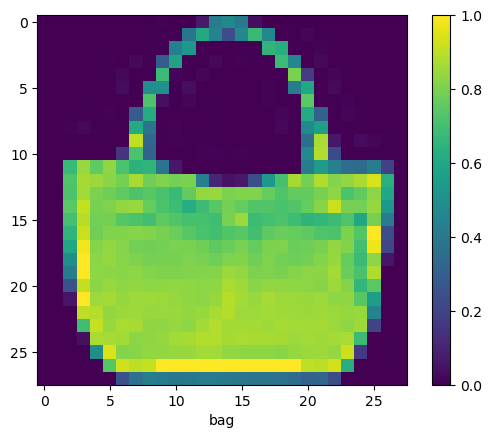

In [121]:
index = 100

plt.figure()
plt.imshow(train_images[index])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[index]])
plt.show()

### Rescale the images by dividing through 255

In [122]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Plot some of the train images with their classes

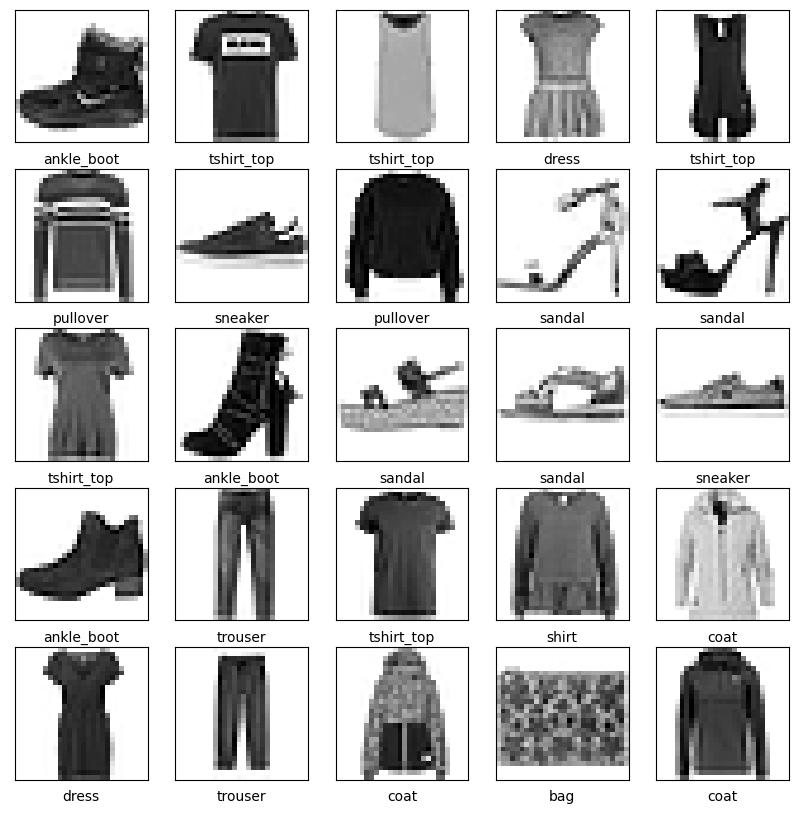

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Fit the Model

Fitting the model is the time consuming part, this depend on the complexity of the model and the amount of training data.
In the fitting process the model is first build up in memory with all the tunable parameters and intercomnnects (with random start values). This is also the limitation of some systems, all these parameters are stored in memory (or when not fitting in a swap file)

**TIP:** do not start the first time with training a lot of epochs, first see if this and all following steps in your system work and when you are sure that all works train your final model. You can also monitor the Jetson CPU/GPU/Memory performance during this process (see Tips & Tricks)

* Explain what hyperparameters are available and what they do.
* Which hyperparameter result in better training results?

Made a CNN using 3 convolution layers and 2 pooling layers for the feature distraction. In the flatten layer and dense layers, the classification part of the model is made.

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu', kernel_initializer="he_normal", input_shape =(28,28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
])


Compiled the model

In [42]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [43]:
if TrainModel == True:
    history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=4, batch_size=1)

Epoch 1/4
60000/60000 [==============================] - 88s 1ms/step - loss: 0.4480 - accuracy: 0.8380 - val_loss: 0.3863 - val_accuracy: 0.8682
Epoch 2/4
60000/60000 [==============================] - 84s 1ms/step - loss: 0.3757 - accuracy: 0.8674 - val_loss: 0.4292 - val_accuracy: 0.8697
Epoch 3/4
60000/60000 [==============================] - 89s 1ms/step - loss: 0.3720 - accuracy: 0.8706 - val_loss: 0.4088 - val_accuracy: 0.8511
Epoch 4/4
60000/60000 [==============================] - 95s 2ms/step - loss: 0.3715 - accuracy: 0.8717 - val_loss: 0.4767 - val_accuracy: 0.8607


# Evaluate Model

Show the model accuracy after the training process ...
* What is the final accuracy of the trained Network?

In [44]:
if TrainModel:
    val_loss, val_acc = model.evaluate(test_images, test_labels, batch_size= 1)
    print(f"Validated loss: {val_loss} , Validated Accuracy: {val_acc}")

10000/10000 [==============================] - 8s 826us/step - loss: 0.4767 - accuracy: 0.8607
Validated loss: 0.4766572117805481 , Validated Accuracy: 0.8607000112533569


The final validated accuracy is 86%, this is using the own test set.

# Save model

Save the model for later usage

In [71]:
import shutil

# remove old account directory


save_path_model = 'saved_models/model'+ str("7")
shutil.rmtree(save_path_model, ignore_errors=True)

model.save(save_path_model)
   

INFO:tensorflow:Assets written to: saved_models/model7\assets


INFO:tensorflow:Assets written to: saved_models/model7\assets


# Evaluate Final Model

After training and saving the model you can deploy this model on any given input image. You can start a new application in where you import this model and apply it on any given imput images, so you can just load the model and don't need the timeconsuming training anymore.

Loading the model into a test_model

In [104]:
test_model = tf.keras.models.load_model('./saved_models/model7')
probability_model = tf.keras.Sequential([test_model, tf.keras.layers.Softmax()])


## Make Prediction

We can use our saved model to make a prediction on new images that are not trained on... make sure the input images receive the same pre-processing as the images you trained on.

So fetch some images from the internet (similar classes, but not from your dataset), prepare them to fit your network and classify them. Do this for  **10 images per class** and show the results!

* How good is the detection on you real dataset? (show some statistics) 

In [123]:
import os
prediction_ds_img_folder = "./testset/datasetTest/"

jpgCount = sum([len(files) for r, d, files in os.walk(prediction_ds_img_folder)])
print("There are: " + str(jpgCount) + " files")

There are: 100 files


The data is loaded a prediction dataset which is used to predict on new data

In [124]:
batch_size = 100
img_height = 28
img_width = 28

prediction_ds = tf.keras.utils.image_dataset_from_directory(
    prediction_ds_img_folder,
    color_mode= 'grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    class_names=['tshirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot'],
    interpolation='nearest')

class_namesT = prediction_ds.class_names
print(class_namesT)

Found 100 files belonging to 10 classes.
['tshirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']


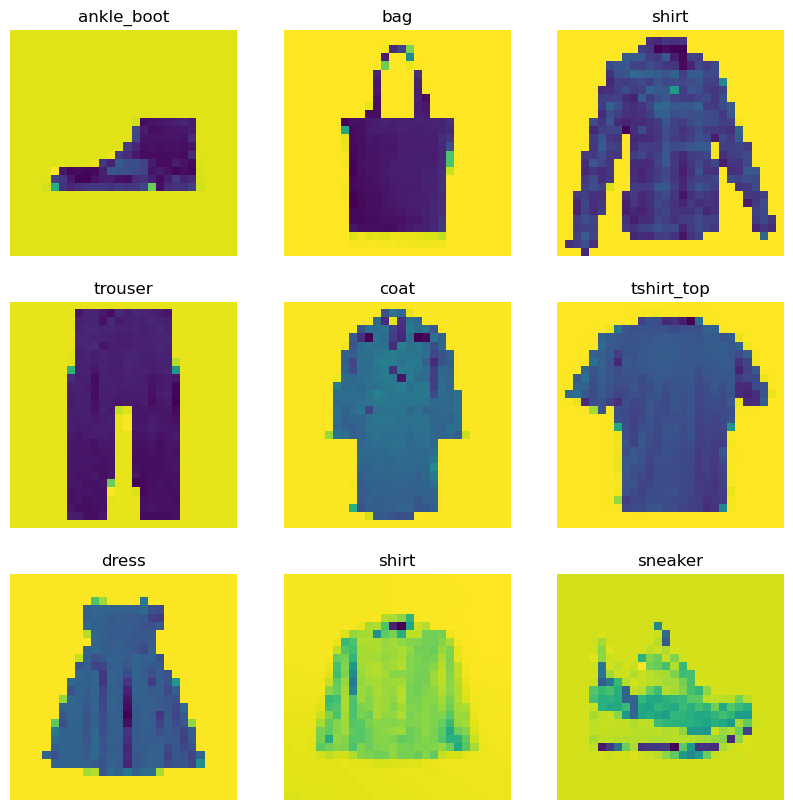

In [108]:
plt.figure(figsize=(10, 10))
for images, labels in prediction_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_namesT[labels[i]])
    plt.axis("off")

Iterate through prediction_ds to gather images and labels. After that the data's grayscale is inverted and reshaped.
At last, a numpy array for the images and labels are created.

In [115]:
for image_batch, labels_batch in prediction_ds:
    x_validation = image_batch
    y_validation = labels_batch



x_validation = inverseImageBW_array(np.array(x_validation) / 255)
x_validation = np.reshape(x_validation, (batch_size,28,28))
y_validation = np.array(y_validation)

x_validation = x_validation + 1
x_validation = np.clip(x_validation, a_min=0, a_max=1)

The data is predicted and after that a plot is created where blue is correct predicted and red is false predicted.

In [116]:
predictSource = x_validation
realLabels = y_validation

predictions = probability_model.predict_on_batch(predictSource)
predictionLabels = np.argmax(predictions, axis=1)

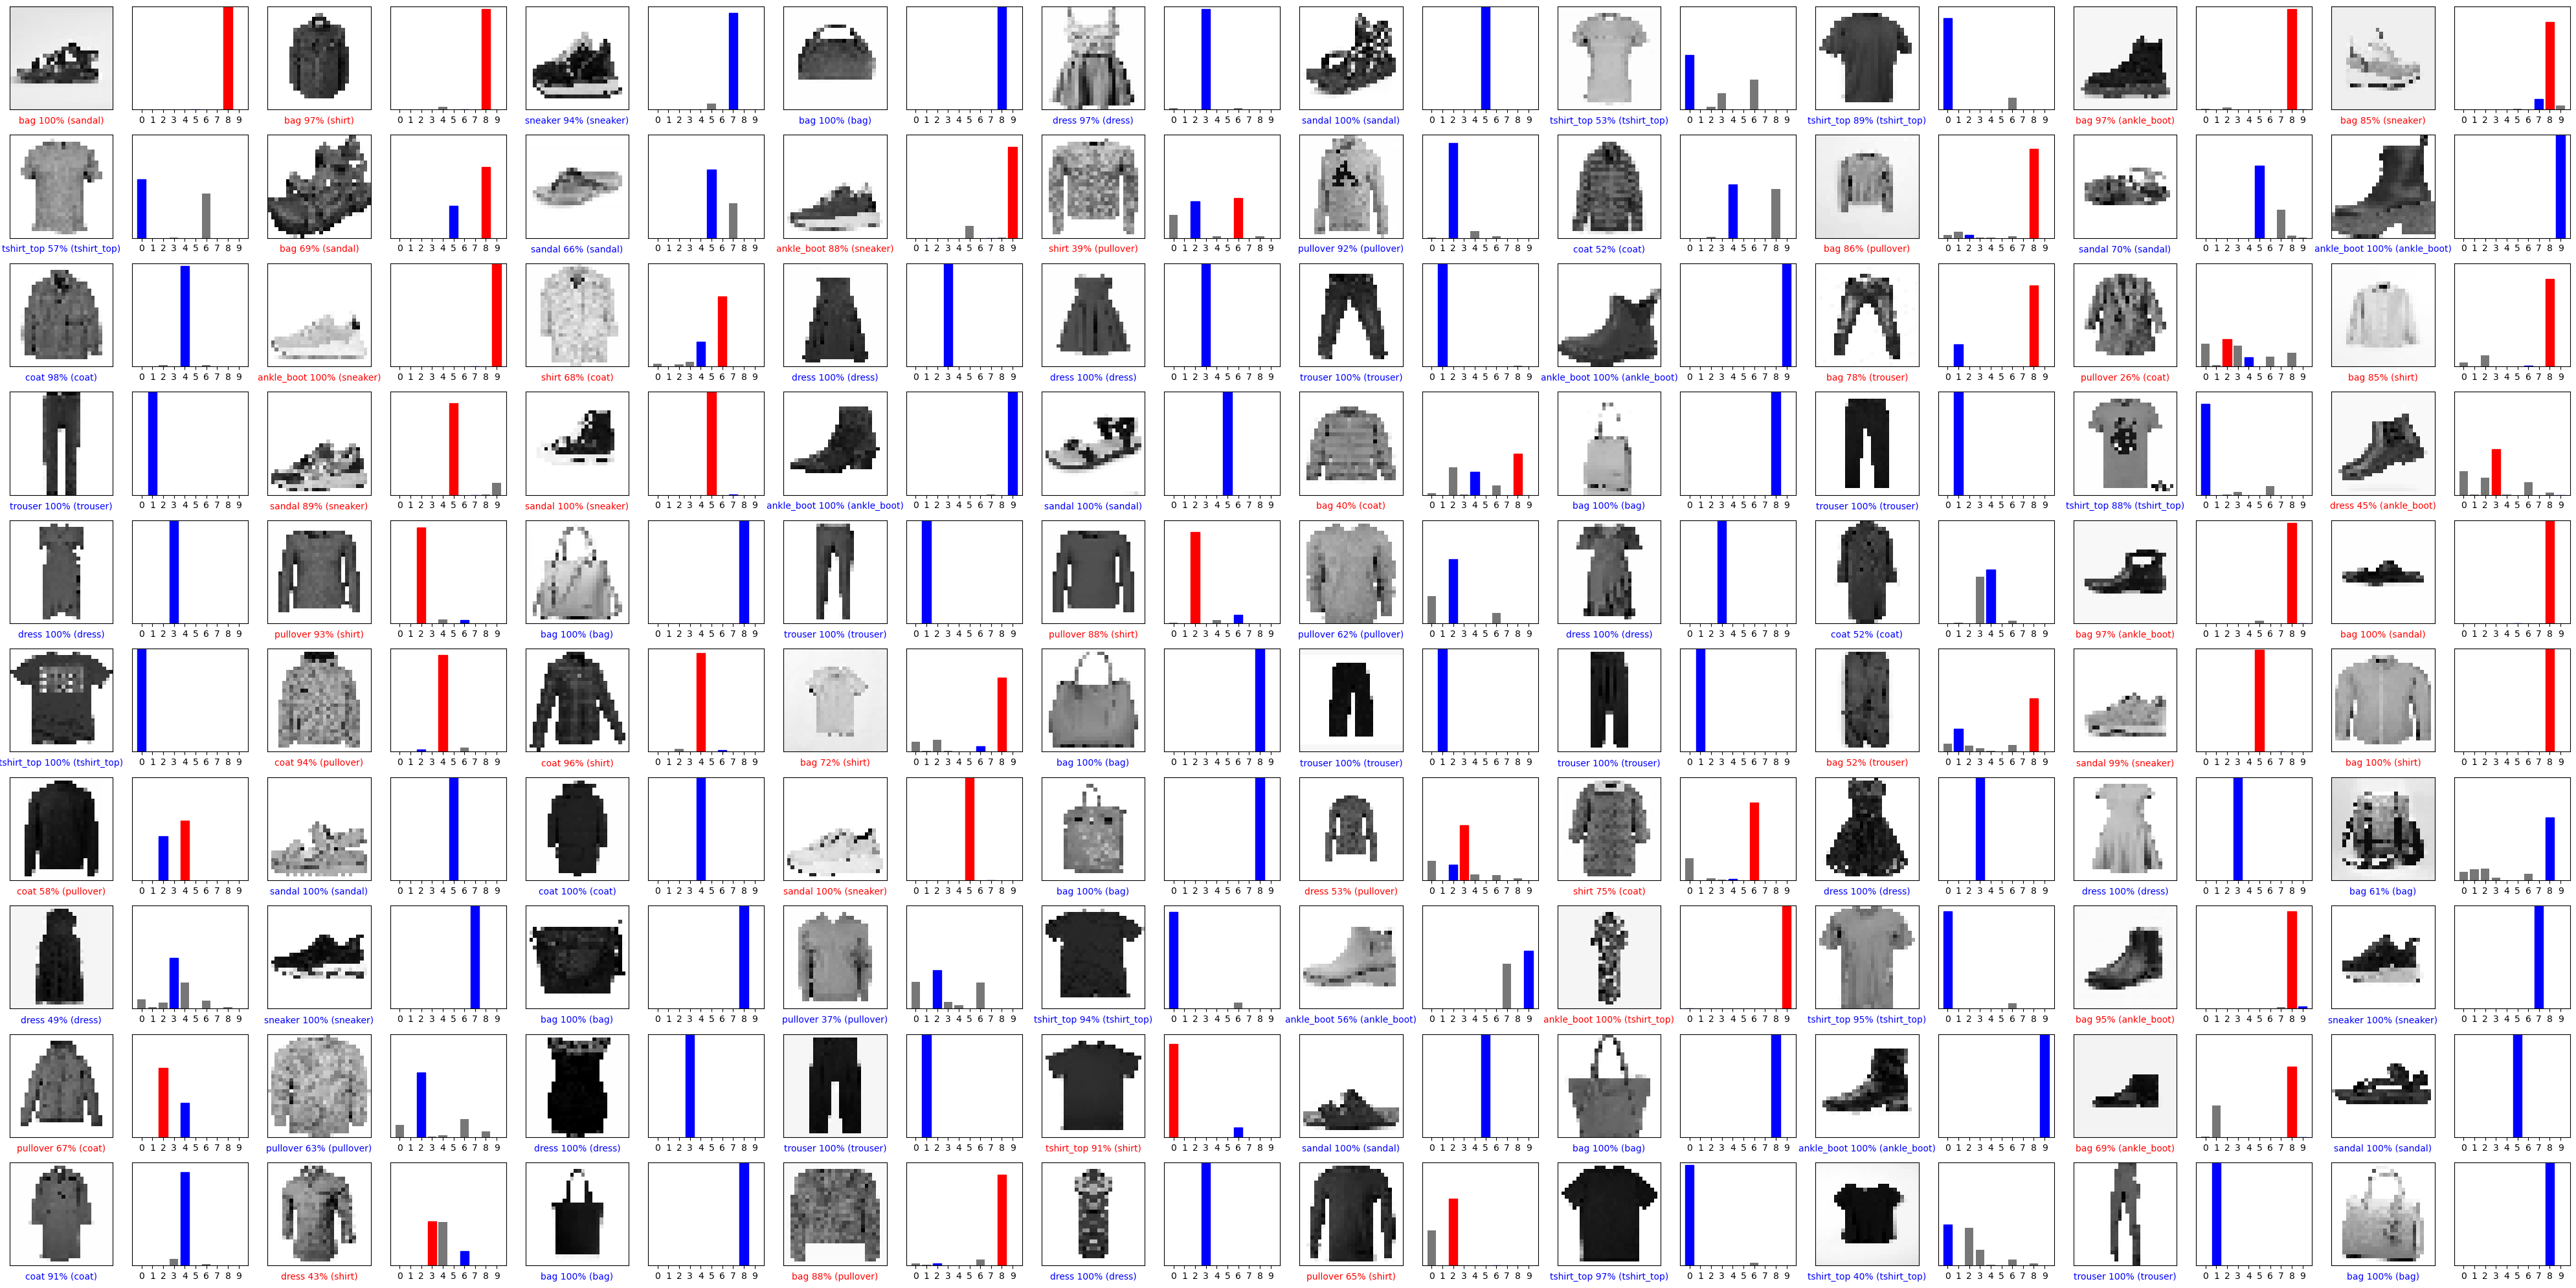

In [119]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], realLabels, predictSource, class_names)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], realLabels)
plt.tight_layout()
plt.show()

Then a confusion matrix is made to see, unfortunately label 6 is not identified.

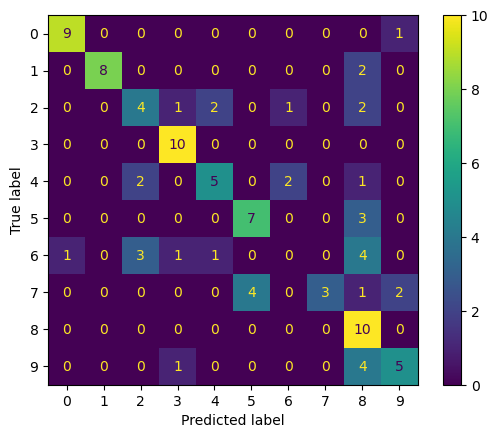

In [114]:
cm = confusion_matrix(realLabels, predictionLabels)
ConfusionMatrixDisplay(cm).plot()

Then the accuracy with the predicted set is measured. This is 61% which is not bad for own data which is not as good preprocessed as the dataset.

In [83]:

val_loss, val_acc = model.evaluate(x_validation, y_validation, batch_size= 1)
print(f"Validated loss: {val_loss} , Validated Accuracy: {val_acc}")

100/100 [==============================] - 0s 819us/step - loss: 2.9123 - accuracy: 0.6100
Validated loss: 2.912320852279663 , Validated Accuracy: 0.6100000143051147


## Additional Questions
* In which way could the network accuracy be improved further (only explanation, no implementation)?